In [ ]:
# Importing Libraries
import cv2
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

In [ ]:
# Load preprocessed numpy arrays for data and target
data = np.load('/content/drive/MyDrive/Colab Notebooks/rp/data-preprocessed-disease.npy')
target = np.load('/content/drive/MyDrive/Colab Notebooks/rp/target-preprocessed-disease.npy')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the pre-trained Xception model
baseModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))



83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
# Freeze the layers in the base model
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# Build the head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

In [ ]:
# Create the final model
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)


In [ ]:
# Define the model checkpoint
checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model', monitor='val_loss', save_best_only=True, mode='auto')


In [ ]:
# Train the model
history = model.fit(train_data, train_target, validation_data=(test_data, test_target), epochs=40, batch_size=8, callbacks=[checkpoint])


Epoch 1/40
109/109 [==============================] - ETA: 0s - loss: 1.1784 - accuracy: 0.5566

109/109 [==============================] - 35s 205ms/step - loss: 1.1784 - accuracy: 0.5566 - val_loss: 0.7313 - val_accuracy: 0.7281
Epoch 2/40
107/109 [============================>.] - ETA: 0s - loss: 0.6206 - accuracy: 0.7722

109/109 [==============================] - 21s 190ms/step - loss: 0.6245 - accuracy: 0.7702 - val_loss: 0.6144 - val_accuracy: 0.7696
Epoch 3/40
107/109 [============================>.] - ETA: 0s - loss: 0.4586 - accuracy: 0.8201

109/109 [==============================] - 20s 181ms/step - loss: 0.4593 - accuracy: 0.8210 - val_loss: 0.5681 - val_accuracy: 0.7834
Epoch 4/40
108/109 [============================>.] - ETA: 0s - loss: 0.3758 - accuracy: 0.8785

109/109 [==============================] - 20s 187ms/step - loss: 0.3804 - accuracy: 0.8776 - val_loss: 0.5339 - val_accuracy: 0.7972
Epoch 5/40
108/109 [============================>.] - ETA: 0s - loss: 0.3529 - accuracy: 0.8773

109/109 [==============================] - 20s 185ms/step - loss: 0.3526 - accuracy: 0.8776 - val_loss: 0.4635 - val_accuracy: 0.8203
Epoch 6/40
109/109 [==============================] - 5s 46ms/step - loss: 0.2486 - accuracy: 0.9076 - val_loss: 0.5081 - val_accuracy: 0.8203
Epoch 7/40
109/109 [==============================] - 5s 43ms/step - loss: 0.2212 - accuracy: 0.9319 - val_loss: 0.5161 - val_accuracy: 0.7972
Epoch 8/40
109/109 [==============================] - 5s 42ms/step - loss: 0.1899 - accuracy: 0.9365 - val_loss: 0.5178 - val_accuracy: 0.7972
Epoch 9/40
109/109 [==============================] - 5s 46ms/step - loss: 0.1430 - accuracy: 0.9503 - val_loss: 0.4814 - val_accuracy: 0.8341
Epoch 10/40
109/109 [==============================] - 5s 46ms/step - loss: 0.1074 - accuracy: 0.9700 - val_loss: 0.5784 - val_accuracy: 0.7972
Epoch 11/40
109/109 [==============================] - 5s 42ms/step - loss: 0.1003 - accuracy: 0.9677 - val_loss: 0.5388 - val_accuracy: 0.8249
Epoch 

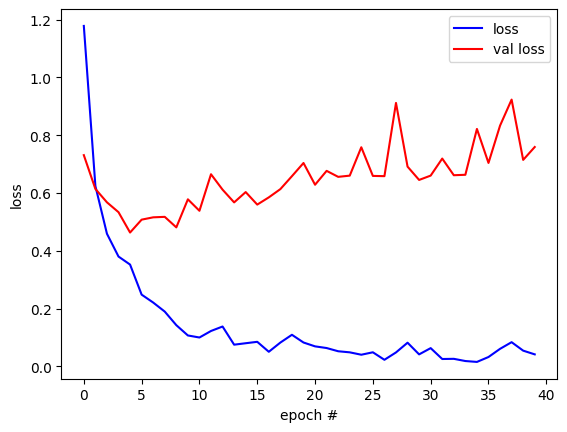

In [ ]:
# Plot the training history
plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'], 'r', label='val loss')
plt.legend()
plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

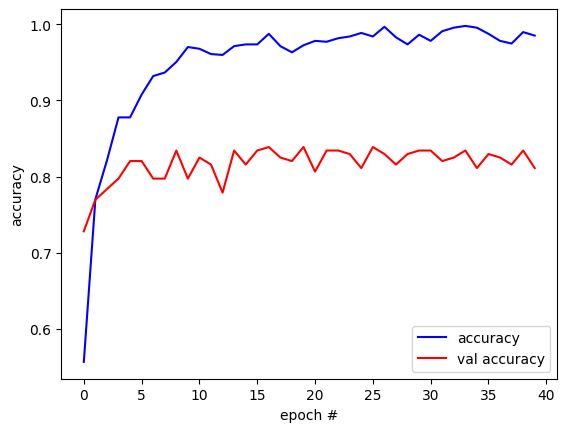

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], 'b', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='val accuracy')
plt.legend()
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# Evaluate the model on the testing set
print(model.evaluate(test_data, test_target))

7/7 [==============================] - 4s 353ms/step - loss: 0.7594 - accuracy: 0.8111
[0.7594412565231323, 0.8110598921775818]


In [ ]:
# Save the model
model.save('Xception.model')